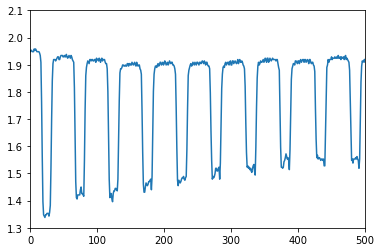

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

sig1=[]
sig2=[]
t = []
i=0

with open('12-11/B-ol5-aq35-pause10.csv') as data:
    for sig in csv.reader(data, delimiter='	'):
        #print(sig)
        sig[0] = sig[0].replace('.','').replace(',','.')
        sig[1] = sig[1].replace('.','').replace(',','.')
        sig[2] = sig[2].replace('.','').replace(',','.')
        #print(sig)
        sig1.append(float(sig[0]))
        sig2.append(float(sig[1]))
        t.append(float(sig[2]))
sig1 = np.array(sig1)
sig2 = np.array(sig2)
t = np.array(t)
        

plt.plot(sig1)
plt.ylim(1.3, 2.1)
plt.xlim(0, 500)
plt.show()
        


[0.9873 1.0079 1.0285 1.0491 1.0697 1.0903 1.1109 1.1315 1.1521 1.1727
 1.1933 1.2139 1.2345 1.2551 1.2757 1.2963 1.3169 1.3375 1.3581 1.3787
 1.3993 1.4199 1.4405 1.4611 1.4817 1.5023 1.5229 1.5435 1.5641 1.5847
 1.6053 1.6259 1.6465 1.6671 1.6877 1.7083 1.7289 1.7495 1.7701 1.7907
 1.8113 1.8319 1.8525 1.8731 1.8937 1.9143 1.9349 1.9555 1.9761 1.9967] 

[0.977  0.9976 1.0182 1.0388 1.0594 1.08   1.1006 1.1212 1.1418 1.1624
 1.183  1.2036 1.2242 1.2448 1.2654 1.286  1.3066 1.3272 1.3478 1.3684
 1.389  1.4096 1.4302 1.4508 1.4714 1.492  1.5126 1.5332 1.5538 1.5744
 1.595  1.6156 1.6362 1.6568 1.6774 1.698  1.7186 1.7392 1.7598 1.7804
 1.801  1.8216 1.8422 1.8628 1.8834 1.904  1.9246 1.9452 1.9658 1.9864
 2.007 ]


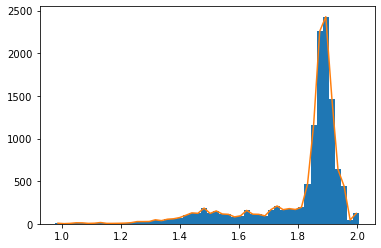

In [2]:
#histogram plot
nbins =50
plt.figure()
freq,bins,p = plt.hist(sig1, nbins)

x = 0.5 *(bins[:-1] + bins[1:])
print(x,'\n')
print(bins)

plt.plot(x,freq)
#plt.plot([x_max1]*2,[0,max_freq1],color='black')
# plt.plot([x_max2]*2,[0,max_freq2],color='black')

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 209
    # data points      = 50
    # variables        = 6
    chi-square         = 303236.756
    reduced chi-square = 6891.74446
    Akaike info crit   = 447.512307
    Bayesian info crit = 458.984445
##  Warning: uncertainties could not be estimated:
    g1_center:     at boundary
    g1_sigma:      at initial value
[[Variables]]
    g1_amplitude:  32.3384611 (init = 121.4)
    g1_center:     1.69388000 (init = 1.08824)
    g1_sigma:      0.06729333 (init = 0.06729333)
    g1_fwhm:       0.15846369 == '2.3548200*g1_sigma'
    g1_height:     191.715575 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  180.923208 (init = 121.4)
    g2_center:     1.88683987 (init = 1.956766)
    g2_sigma:      0.02960763 (init = 0.06729333)
    g2_fwhm:       0.06972063 == '2.3548200*g2_sigma'
    g2_height:     243

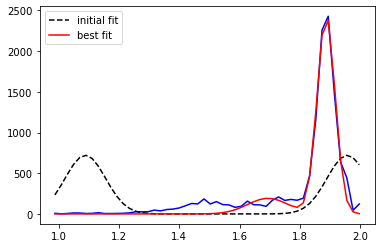

trying again
[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 114
    # data points      = 50
    # variables        = 6
    chi-square         = 339427.374
    reduced chi-square = 7714.25850
    Akaike info crit   = 453.149614
    Bayesian info crit = 464.621752
##  Warning: uncertainties could not be estimated:
    g1_sigma:      at initial value
[[Variables]]
    g1_amplitude:  29.3497410 (init = 121.4)
    g1_center:     1.51711459 (init = 1.18918)
    g1_sigma:      0.06729333 (init = 0.06729333)
    g1_fwhm:       0.15846369 == '2.3548200*g1_sigma'
    g1_height:     173.997224 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  182.574852 (init = 121.4)
    g2_center:     1.88664928 (init = 1.956766)
    g2_sigma:      0.02995335 (init = 0.06729333)
    g2_fwhm:       0.07053475 == '2.3548200*g2_sigma'
    g2_height:     2431.67567 == '0.3989

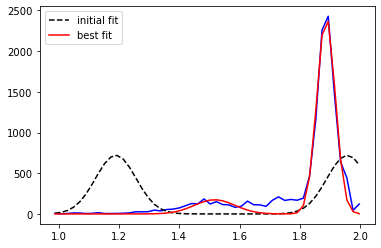

xmax 1:  1.4817 
 xmax 2:  1.8937000000000002


In [3]:
#histogram fit

from lmfit.models import GaussianModel

for i in range(1,6):    #Cicle changing center1 position if condition (center1+2*sigma1 < center2-2*sigma2) is not fulfilled

    #linear = LinearModel(prefix='lin_')
    gauss1 = GaussianModel(prefix='g1_')
    pars = gauss1.make_params(center=x[0]+i*(x[-1]-x[0])/10, sigma=(x[-1]-x[0])/15 , amplitude=max(freq)/20)

    #gauss1 = GaussianModel(prefix='g1_')
    #pars.update(gauss1.make_params())

    gauss2 = GaussianModel(prefix='g2_')
    pars.update(gauss2.make_params())

    pars['g1_center'].set(max = x[0]+(x[-1]-x[0])*0.7, min=min(x))
    pars['g1_sigma'].set(max=(x[-1]-x[0])/10,min=(x[-1]-x[0])/30)
    #pars['g1_amplitude'].set(value=max(freq)/20,min=10)

    pars['g2_center'].set(value=x[-1]*0.98)
    pars['g2_sigma'].set(value=(x[-1]-x[0])/15)
    pars['g2_amplitude'].set(value=max(freq)/20,min=10)

    #mod = linear + gauss1 +gauss2
    mod = gauss1 +gauss2

    init = mod.eval(pars, x=x)
    out = mod.fit(freq, pars, x=x)
    print(out.fit_report())

    plt.plot(x, freq, color='blue')
    plt.plot(x, out.init_fit, 'k--', label='initial fit')
    plt.plot(x, out.best_fit, 'r-', label='best fit')
    plt.legend(loc='best')
    #plt.xlim(30, 150)
    plt.show()
    
    center2=out.best_values.get('g2_center')
    sigma2=out.best_values.get('g2_sigma')
    center1=out.best_values.get('g1_center')
    sigma1=out.best_values.get('g1_sigma')
    
    if center1+2*sigma1 < center2-2*sigma2:
        max_freq1=max(freq[x<center1+sigma1])
        x_max1 = x[np.argmax(freq[x<center1+2*sigma1])]
        max_freq2=max(freq[x>center2-sigma2])
        a=x>center2-sigma2
        freq2=np.zeros(len(freq))
        for i in range(len(a)): 
            if a[i]==True: freq2[i]=freq[i]
        #print(freq2)
        x_max2 = x[np.argmax(freq2)]
        print('xmax 1: ', x_max1,'\n xmax 2: ',x_max2)
        break
    else: print('trying again')
soglia_sig1_low = x_max1 +sigma1
soglia_sig1_high = x_max2 -sigma1

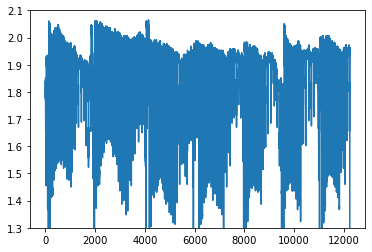

[1.15618 1.17454 1.1929  1.21126 1.22962 1.24798 1.26634 1.2847  1.30306
 1.32142 1.33978 1.35814 1.3765  1.39486 1.41322 1.43158 1.44994 1.4683
 1.48666 1.50502 1.52338 1.54174 1.5601  1.57846 1.59682 1.61518 1.63354
 1.6519  1.67026 1.68862 1.70698 1.72534 1.7437  1.76206 1.78042 1.79878
 1.81714 1.8355  1.85386 1.87222 1.89058 1.90894 1.9273  1.94566 1.96402
 1.98238 2.00074 2.0191  2.03746 2.05582] 

[1.147   1.16536 1.18372 1.20208 1.22044 1.2388  1.25716 1.27552 1.29388
 1.31224 1.3306  1.34896 1.36732 1.38568 1.40404 1.4224  1.44076 1.45912
 1.47748 1.49584 1.5142  1.53256 1.55092 1.56928 1.58764 1.606   1.62436
 1.64272 1.66108 1.67944 1.6978  1.71616 1.73452 1.75288 1.77124 1.7896
 1.80796 1.82632 1.84468 1.86304 1.8814  1.89976 1.91812 1.93648 1.95484
 1.9732  1.99156 2.00992 2.02828 2.04664 2.065  ]
[  34.   45.   19.    8.   15.   12.    8.    8.    9.   24.   25.   24.
   31.   45.   47.   88.   73.  114.  130.  118.   74.   82.   98.   90.
   65.   86.   87.  109.   93.  

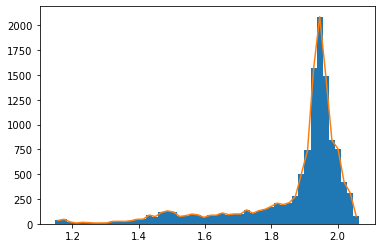

In [4]:
#same for sig2
plt.plot(sig2)
plt.ylim(1.3, 2.1)
#plt.xlim(0, 500)
plt.show()

#histogram plot
nbins =50
plt.figure()
freq,bins,p = plt.hist(sig2[0:-2], nbins)


x = 0.5 *(bins[:-1] + bins[1:])
print(x,'\n')
print(bins)

plt.plot(x,freq)
print(freq)

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 240
    # data points      = 50
    # variables        = 6
    chi-square         = 626853.118
    reduced chi-square = 14246.6618
    Akaike info crit   = 483.822226
    Bayesian info crit = 495.294364
##  Warning: uncertainties could not be estimated:
    g1_sigma:      at initial value
[[Variables]]
    g1_amplitude:  19.6825629 (init = 104.3)
    g1_center:     1.52170026 (init = 1.246144)
    g1_sigma:      0.05997600 (init = 0.059976)
    g1_fwhm:       0.14123268 == '2.3548200*g1_sigma'
    g1_height:     130.922484 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  162.223706 (init = 104.3)
    g2_center:     1.94789986 (init = 2.014704)
    g2_sigma:      0.03638317 (init = 0.059976)
    g2_fwhm:       0.08567582 == '2.3548200*g2_sigma'
    g2_height:     1778.78655 == '0.3989423*g2_amplitude

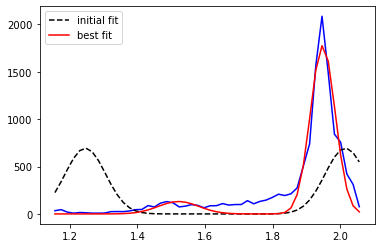

xmax 1:  1.48666 
 xmax 2:  1.94566


In [5]:
#histogram fit

from lmfit.models import GaussianModel

for i in range(1,6):    #Cicle changing center1 position if condition (center1+2*sigma1 < center2-2*sigma2) is not fulfilled

    #linear = LinearModel(prefix='lin_')
    gauss1 = GaussianModel(prefix='g1_')
    pars = gauss1.make_params(center=x[0]+i*(x[-1]-x[0])/10, sigma=(x[-1]-x[0])/15 , amplitude=max(freq)/20)

    #gauss1 = GaussianModel(prefix='g1_')
    #pars.update(gauss1.make_params())

    gauss2 = GaussianModel(prefix='g2_')
    pars.update(gauss2.make_params())

    pars['g1_center'].set(max = x[0]+(x[-1]-x[0])*0.7, min=min(x))
    pars['g1_sigma'].set(max=(x[-1]-x[0])/10,min=(x[-1]-x[0])/30)
    #pars['g1_amplitude'].set(value=max(freq)/20,min=10)

    pars['g2_center'].set(value=x[-1]*0.98)
    pars['g2_sigma'].set(value=(x[-1]-x[0])/15)
    pars['g2_amplitude'].set(value=max(freq)/20,min=10)

    #mod = linear + gauss1 +gauss2
    mod = gauss1 +gauss2

    init = mod.eval(pars, x=x)
    out = mod.fit(freq, pars, x=x)
    print(out.fit_report())

    plt.plot(x, freq, color='blue')
    plt.plot(x, out.init_fit, 'k--', label='initial fit')
    plt.plot(x, out.best_fit, 'r-', label='best fit')
    plt.legend(loc='best')
    #plt.xlim(30, 150)
    plt.show()
    
    center2=out.best_values.get('g2_center')
    sigma2=out.best_values.get('g2_sigma')
    center1=out.best_values.get('g1_center')
    sigma1=out.best_values.get('g1_sigma')
    
    if center1+2*sigma1 < center2-2*sigma2:
        max_freq1=max(freq[x<center1+sigma1])
        x_max1 = x[np.argmax(freq[x<center1+sigma1])]
        max_freq2=max(freq[x>center2-sigma2])
        a=x>center2-sigma2
        freq2=np.zeros(len(freq))
        for i in range(len(a)): 
            if a[i]==True: freq2[i]=freq[i]
        #print(freq2)
        x_max2 = x[np.argmax(freq2)]
        print('xmax 1: ', x_max1,'\n xmax 2: ',x_max2)
        break
    else: print('trying again')
    
soglia_sig2_low = x_max1 +sigma1
soglia_sig2_high = x_max2 -sigma2

1.5489933333333334
1.8264066666666667


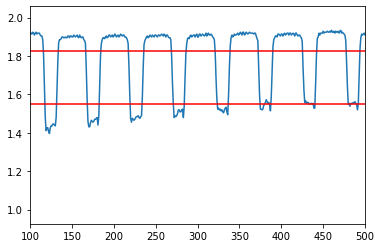

In [6]:
print(soglia_sig1_low)
print(soglia_sig1_high)

plt.plot(sig1)
plt.plot(soglia_sig1_high*np.ones(len(t)), color='red')
plt.plot(soglia_sig1_low*np.ones(len(t)), color='red')
plt.xlim(100,500)
#plt.ylim(1.5,1.95)
plt.show()

In [7]:
soglia_sig2_high*np.ones(len(x))

array([1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683,
       1.90927683, 1.90927683, 1.90927683, 1.90927683, 1.90927683])

1.5466360000000001
1.909276827288779


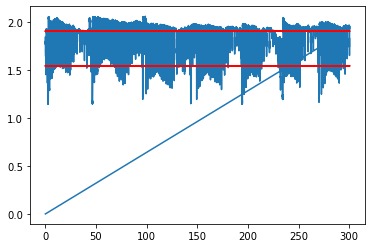

In [8]:
print(soglia_sig2_low)
print(soglia_sig2_high)

plt.plot(t,sig2)
plt.plot(t,soglia_sig2_high*np.ones(len(t)), color='red')
plt.plot(t,soglia_sig2_low*np.ones(len(t)), color='red')
#plt.xlim(330,380)
plt.show()

In [9]:
#definisco una goccia da quando il segnale sale sopra la soglia alta a quando scende sotto la soglia bassa
bool_high=sig1>soglia_sig1_high
bool_low=sig1<soglia_sig1_low
print(bool_high, len(bool_high))
print(bool_low, len(bool_low))


[ True  True  True ...  True  True  True] 12241
[False False False ... False False False] 12241


In [10]:
goccia_start =[0]
goccia_end = [1]
for i in range(len(sig1)-1):
    if bool_low[i]==False and bool_high[i]==False and bool_low[i+1]==False and bool_high[i+1]==True:
        if goccia_start[-1:]<goccia_end[-1:]:
            goccia_start.append(i+1)
    elif bool_low[i]==True and bool_high[i]==False and bool_low[i+1]==False and bool_high[i+1]==True:
        if goccia_start[-1:]<goccia_end[-1:]:
            goccia_start.append(i+1)
    elif bool_low[i]==False and bool_high[i]==True and bool_low[i+1]==True and bool_high[i+1]==False:
        if goccia_start[-1:]>goccia_end[-1:]:
            goccia_end.append(i)
    elif bool_low[i]==False and bool_high[i]==False and bool_low[i+1]==True and bool_high[i+1]==False:
        if goccia_start[-1:]>goccia_end[-1:]:
            goccia_end.append(i)


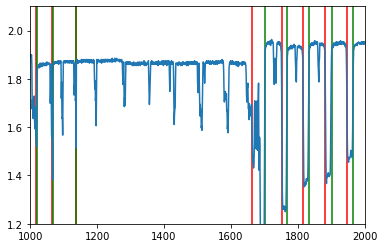

In [17]:
ymin=1.2
ymax=2.1
plt.plot(sig1)
plt.plot(0,500)
plt.ylim(ymin,ymax)

for i in range(len(goccia_end)):
    #print(goccia_start[i],goccia_end[i])
    plt.vlines(goccia_start[i], ymin, ymax, color='green')
    plt.vlines(goccia_end[i], ymin, ymax, color='red')

plt.xlim(1000,2000)
plt.show()